In [19]:
#Importing the Python Modules
import numpy as np
import matplotlib.pyplot as plt


##
    Solves the linear system Ax = b using the Conjugate Gradient method.
    
    Parameters:
        A (numpy.ndarray): The coefficient matrix (must be symmetric positive definite).
        b (numpy.ndarray): The right-hand side vector.
        x0 (numpy.ndarray): Initial guess for the solution.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations allowed.
        
    Returns:
        x (numpy.ndarray): Solution vector.
        num_iter (int): Number of iterations used.
##

In [17]:

# Considering a simple k-space data represented as a 5x5 matrix 
k_space = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0]
])
k_space

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]])

In [6]:
# Adding Noise to the k-space data to represent undersampled k-space data

noisy_k_space = k_space + 0.1 * np.random.randn(*k_space.shape)
noisy_k_space

array([[ 0.02755374,  0.01275066,  1.06248974,  0.04446209, -0.16945097],
       [-0.07126796,  0.86288304,  0.8770379 ,  1.16816411,  0.03377878],
       [ 1.06105264,  0.94780587,  0.94556643,  0.93243785,  0.93928366],
       [-0.04467376,  1.08314983,  1.16650487,  0.91375691, -0.10497297],
       [-0.02187859,  0.02093842,  0.97896994, -0.11662035,  0.00895421]])

In [20]:
# Defining the system matrix H(identity matrix for simplicity)-->It must be a symmetric positive definite
H = np.eye(noisy_k_space.size)
H.shape

(25, 25)

In [13]:
# Flatten the noisy k-space data into a vector (y in Hx = y)
y = noisy_k_space.flatten()
y


array([ 0.02755374,  0.01275066,  1.06248974,  0.04446209, -0.16945097,
       -0.07126796,  0.86288304,  0.8770379 ,  1.16816411,  0.03377878,
        1.06105264,  0.94780587,  0.94556643,  0.93243785,  0.93928366,
       -0.04467376,  1.08314983,  1.16650487,  0.91375691, -0.10497297,
       -0.02187859,  0.02093842,  0.97896994, -0.11662035,  0.00895421])

In [11]:
# Initial guess for the solution (can be zeros or any other initialization)
x0 = np.zeros_like(y)
x0
tol=1e-6 #error limit
max_iter=1000

In [12]:
x = x0.copy()
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
np.dot(H, x)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
# Defining the Gradient and Distance Vectors
r = np.dot(H, x)-y #This is the Gradient Vector
p = -r
#rsold = np.dot(r, r)

In [47]:
r

array([ 0.02755374,  0.01275066,  1.06248974,  0.04446209, -0.16945097,
       -0.07126796,  0.86288304,  0.8770379 ,  1.16816411,  0.03377878,
        1.06105264,  0.94780587,  0.94556643,  0.93243785,  0.93928366,
       -0.04467376,  1.08314983,  1.16650487,  0.91375691, -0.10497297,
       -0.02187859,  0.02093842,  0.97896994, -0.11662035,  0.00895421])

In [57]:
for k in range(max_iter):
  alpha_num=-(np.dot((np.transpose(r)),p))
  alpha_den=np.dot(np.transpose(p),(np.dot(H,p)))
  alpha=alpha_num/alpha_den #Finding Step Parameter
  x=x + (alpha*p)
  r=np.dot(H, x)-y
  if np.sqrt(r) < tol:
   break
  Beta_num=np.dot(np.transpose(r),np.dot(H,p))
  Beta_den=np.dot(np.transpose(p),np.dot(H,p))
  Beta=Beta_num/Beta_den
  p=-r+ (Beta*p)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
x

In [ ]:
k+1

In [54]:
p

array([-0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,  0., -0.])

In [52]:
Beta

0.0

In [58]:
 # Reshape the solution vector into a 2D image
reconstructed_image = x.reshape(image.shape)



ArithmeticError

NameError: name 'reconstructed_image' is not defined

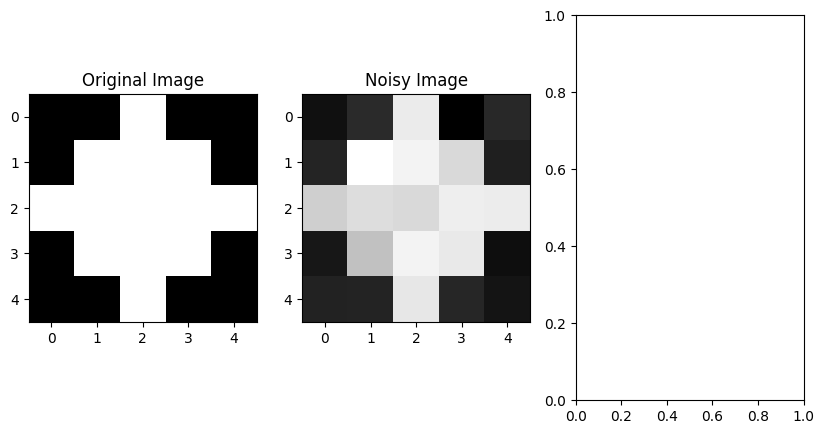

In [24]:
# Plot the original image, noisy image, and reconstructed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image (CG)')
plt.show()

print("Number of iterations:", num_iter)


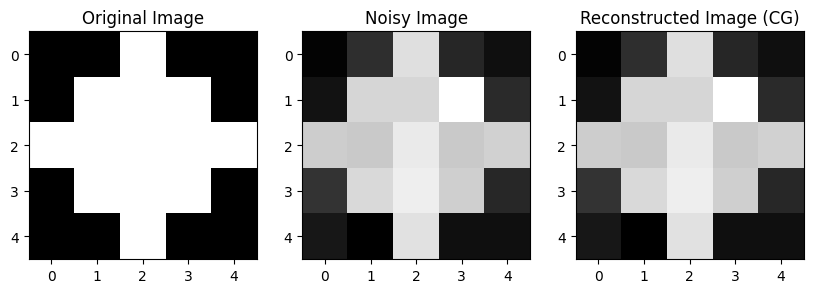

Number of iterations: 1


In [25]:
# Code from the Website

import numpy as np
import matplotlib.pyplot as plt

def conjugate_gradient(A, b, x0, tol=1e-6, max_iter=1000):
    """
    Solves the linear system Ax = b using the Conjugate Gradient method.
    
    Parameters:
        A (numpy.ndarray): The coefficient matrix (must be symmetric positive definite).
        b (numpy.ndarray): The right-hand side vector.
        x0 (numpy.ndarray): Initial guess for the solution.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations allowed.
        
    Returns:
        x (numpy.ndarray): Solution vector.
        num_iter (int): Number of iterations used.
    """
    x = x0.copy()
    r = b - np.dot(A, x)
    p = r.copy()
    rsold = np.dot(r, r)
    
    for i in range(max_iter):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(p, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = np.dot(r, r)
        if np.sqrt(rsnew) < tol:
            break
        beta = rsnew / rsold
        p = r + beta * p
        rsold = rsnew
    
    return x, i+1

# Example: Image reconstruction
# Suppose we have a simple image represented as a 5x5 matrix
image = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0]
])

# Generate a noisy version of the image
noisy_image = image + 0.1 * np.random.randn(*image.shape)

# Define the system matrix A (identity matrix for simplicity)
A = np.eye(image.size)

# Flatten the noisy image into a vector (b in Ax = b)
b = noisy_image.flatten()

# Initial guess for the solution (can be zeros or some other initialization)
x0 = np.zeros_like(b)

# Solve the system using conjugate gradient method
reconstructed_image, num_iter = conjugate_gradient(A, b, x0)

# Reshape the solution vector into a 2D image
reconstructed_image = reconstructed_image.reshape(image.shape)

# Plot the original image, noisy image, and reconstructed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image (CG)')
plt.show()

print("Number of iterations:", num_iter)
